Artificial Neural Network(ANN)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__


'2.16.0-rc0'

Part 1 - Data Preprocessing

Importing the Data set

In [3]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=df.iloc[:,3:-1].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

Encoding The Categorical Data

Label Encoding The "Gender" Column

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])

In [7]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

One Hot Encoding The "Geography" Column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Splitting The Data set into Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [10]:
x_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 163830.64],
       [0.0, 1.0, 0.0, ..., 1, 1, 57098.0],
       [1.0, 0.0, 0.0, ..., 1, 0, 185630.76],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 181429.87],
       [0.0, 0.0, 1.0, ..., 1, 1, 148750.16],
       [0.0, 1.0, 0.0, ..., 1, 0, 118855.26]], dtype=object)

In [11]:
x_test

array([[0.0, 1.0, 0.0, ..., 1, 1, 192852.67],
       [1.0, 0.0, 0.0, ..., 1, 0, 128702.1],
       [0.0, 0.0, 1.0, ..., 1, 1, 75732.25],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 141533.19],
       [0.0, 1.0, 0.0, ..., 1, 1, 11276.48],
       [0.0, 1.0, 0.0, ..., 1, 0, 192950.6]], dtype=object)

In [12]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Feature Scaling

In [14]:
#? we need to apply feature scaling to each and every variable in neural network
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.transform(x_train)


In [15]:
x_train

array([[-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  1.1162265 ],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -0.74330928],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.4960363 ],
       ...,
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.42284683],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121,  0.85348876],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.33264869]])

In [16]:
x_test

array([[-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121,  1.62185911],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.62356528]])

Part 2 - Building the ANN (Artificial Neural Network)

Initializing the ANN

In [17]:
ann=tf.keras.models.Sequential()

Adding the Input layer and the first hidden layer

In [18]:
# shalow layer 
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

Adding the second hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

Adding the Output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
# ! for binary sigmoid
# ? for non binary softmax

Part 3 - Training The ANN

Compiling the ANN

In [21]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# ! binary outcome loss = " binary_crossentropy"
# ? for non binary "categorical_crossentropy"

Training The ANN model on the Training Set

In [22]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)
# ann.fit(x_train,y_train,batch_size=32,epochs=100)
# batch size is hyperparameter and given most used value 32



Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5155 - loss: 0.7048
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.5063
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4518
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.4254
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.4174
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4028
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8379 - loss: 0.3840
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8406 - loss: 0.3813
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3712
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8555 - loss: 0.3570
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8488 - loss: 0.3621
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

Part 4 - Making The Prediction and evaluating the model

Predicting result of a single observation

In [23]:
print(ann.predict(sc.transform([[1, 0, 0,600,1,40,3,60000,2,2,2,50000]])))
print(ann.predict(sc.transform([[1, 0, 0,600,1,40,3,60000,2,2,2,50000]]))>0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
[[0.00370209]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[False]]


Prdicting the results for x_test dataset

In [24]:
y_pred=ann.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[0.28053287 0.        ]
 [0.31006232 1.        ]
 [0.24631567 0.        ]
 ...
 [0.18015698 0.        ]
 [0.21020332 0.        ]
 [0.26984823 0.        ]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Making The Confussion Matrix

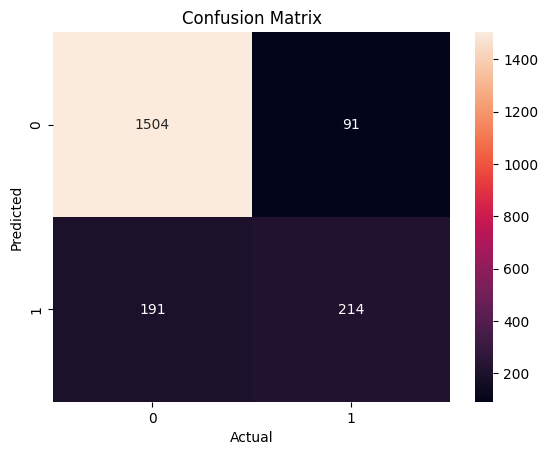

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("confusion_matrix1.png")
plt.show()

Accuracy Score

In [26]:
print(accuracy_score(y_test,y_pred))

0.859


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

